#MENTAL HEALTH ANALYSIS IN UNIVERSITY

EDA (Exploratory Data Analysis):
1. How do academic and mental health differ on different universities?
2. What factors are most strongly correlated with depression and anxiety among college students?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import matplotlib.cm as cm

###LOAD DATASET

Dataset Source: https://www.kaggle.com/datasets/abdullahashfaqvirk/student-mental-health-survey/data

In [4]:
#from google.colab import files
#uploaded = files.upload()
mental = pd.read_csv('./MentalHealthSurvey.csv')

In [5]:
pd.set_option('display.max_columns', None)
mental.head(4)

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,average_sleep,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,4-6 hrs,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,4-6 hrs,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,2-4 hrs,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,4-6 hrs,3,5,4,4,1,5,5,5,3,Online Entertainment


##Data Preprocessing

In [6]:
display(mental.isnull().sum())

gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64

In [7]:
mental['age'] = mental['age'].fillna(mental['age'].median())  # Isi nilai NaN dengan median

###List columns by data types

In [8]:
display('Row, Columns', mental.shape)
display(mental.info())

'Row, Columns'

(87, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

None

In [9]:
# Strip spaces from all columns
mental.columns = mental.columns.str.strip()

# Semua kolom
all_columns = mental.columns.tolist()
numeric_columns = mental.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Kolom numerik
categorical_columns = mental.select_dtypes(include=['object']).columns.tolist()  # Kolom kategorikal

# Tampilkan hasil
#display(numeric_columns, categorical_columns)


In [10]:
# Hilangkan kolom tertentu
columns_to_count = [col for col in categorical_columns if col != 'stress_relief_activities']

# Hitung nilai unik
for column in columns_to_count:
    display(mental[column].value_counts())

'''
# Hilangkan kolom
columns_to_count = [col for col in categorical_columns if col != 'stress_relief_activities']

# Hitung nilai unik
display(mental[columns_to_count].apply(lambda col: col.value_counts()))  # Tampilkan hasil
'''

gender
Male      63
Female    24
Name: count, dtype: int64

university
PU         56
UET        10
COMSATS     9
FAST        6
UMT         2
NUST        1
VU          1
UOL         1
KUST        1
Name: count, dtype: int64

degree_level
Undergraduate    85
Postgraduate      2
Name: count, dtype: int64

degree_major
Data Science              41
Computer Science          34
Information Technology     9
Software Engineering       3
Name: count, dtype: int64

academic_year
1st year    34
3rd year    28
2nd year    15
4th year    10
Name: count, dtype: int64

cgpa
3.0-3.5    27
3.5-4.0    27
2.5-3.0    22
0.0-0.0     5
2.0-2.5     4
1.5-2.0     2
Name: count, dtype: int64

residential_status
Off-Campus    65
On-Campus     22
Name: count, dtype: int64

campus_discrimination
No     65
Yes    22
Name: count, dtype: int64

sports_engagement
No Sports    42
1-3 times    24
4-6 times    11
7+ times     10
Name: count, dtype: int64

average_sleep
4-6 hrs    50
7-8 hrs    32
2-4 hrs     5
Name: count, dtype: int64

"\n# Hilangkan kolom\ncolumns_to_count = [col for col in categorical_columns if col != 'stress_relief_activities']\n\n# Hitung nilai unik\ndisplay(mental[columns_to_count].apply(lambda col: col.value_counts()))  # Tampilkan hasil\n"

In [11]:
mental.describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


###CATEGORICAL COLUMNS HISTOGRAMS AND VIOLINPLOT

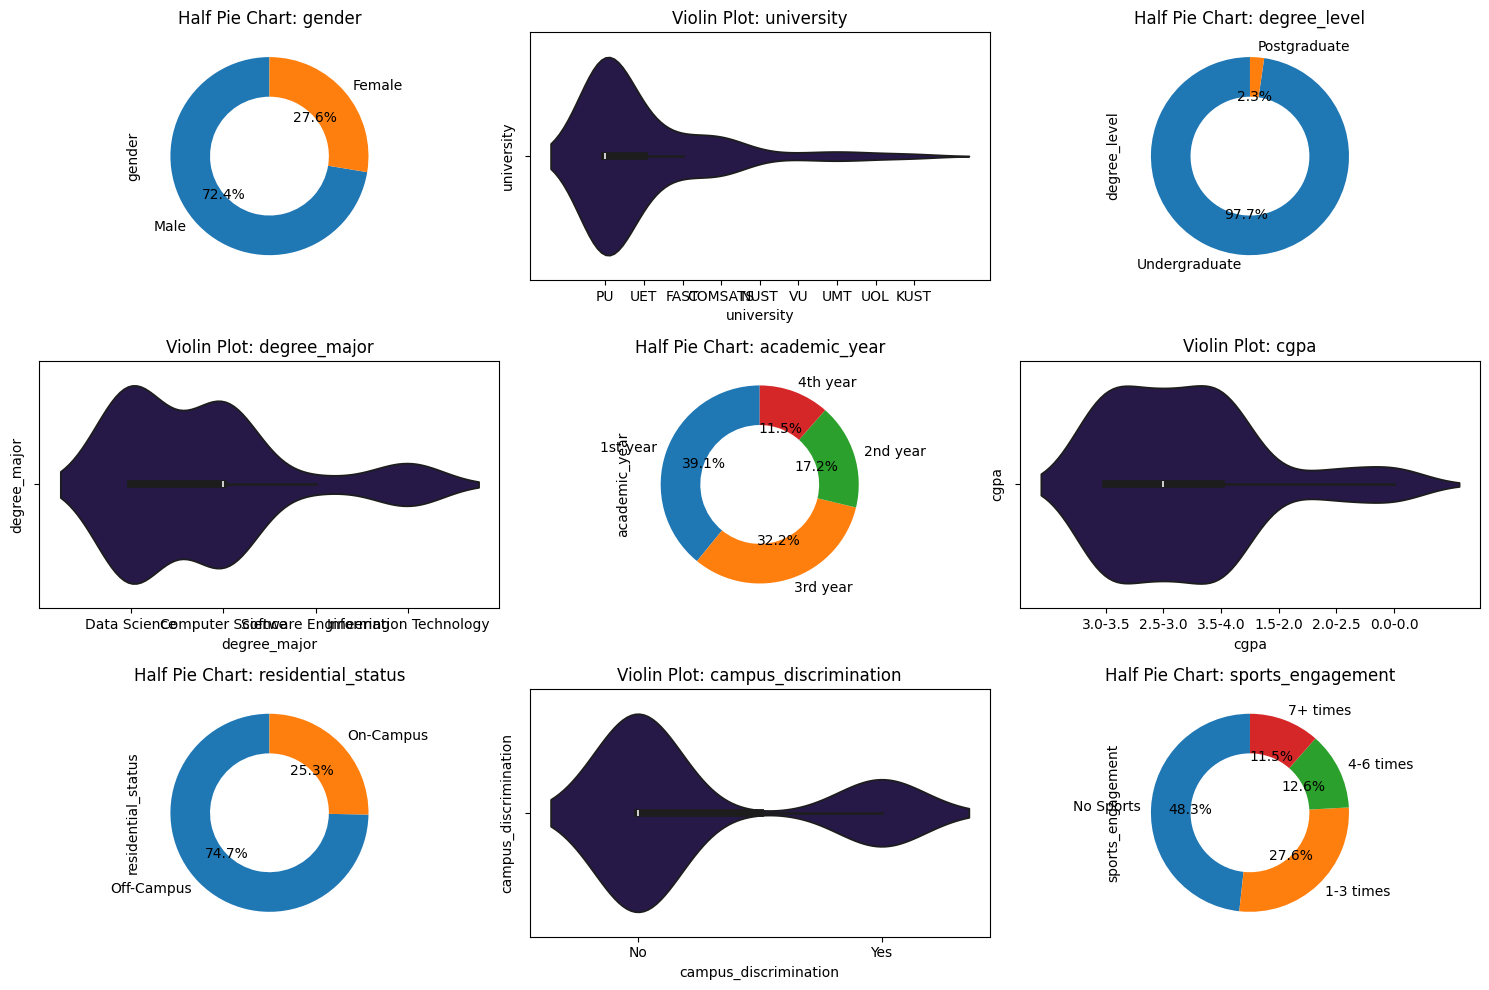

In [12]:
# Hilangkan kolom tertentu
columns_to_count = [col for col in categorical_columns if col != 'stress_relief_activities']

# Set figure size
plt.figure(figsize=(15, 10))

# Iterate through columns and display either pie chart or violin plot
for i, column in enumerate(columns_to_count[:9]):
    plt.subplot(3, 3, i + 1)  # Create subplots
    if i % 2 == 0:  # Even index (half pie chart)
        # Create half pie chart
        value_counts = mental[column].value_counts()
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
        plt.title(f'Half Pie Chart: {column}')
    else:  # Odd index (violin plot)
        # Create violin plot (alternative to boxplot)
        sns.violinplot(x=mental[column], color=sns.color_palette("magma")[0])
        plt.title(f'Violin Plot: {column}')

    plt.ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


###NUMERICAL COLUMNS HEATMAP

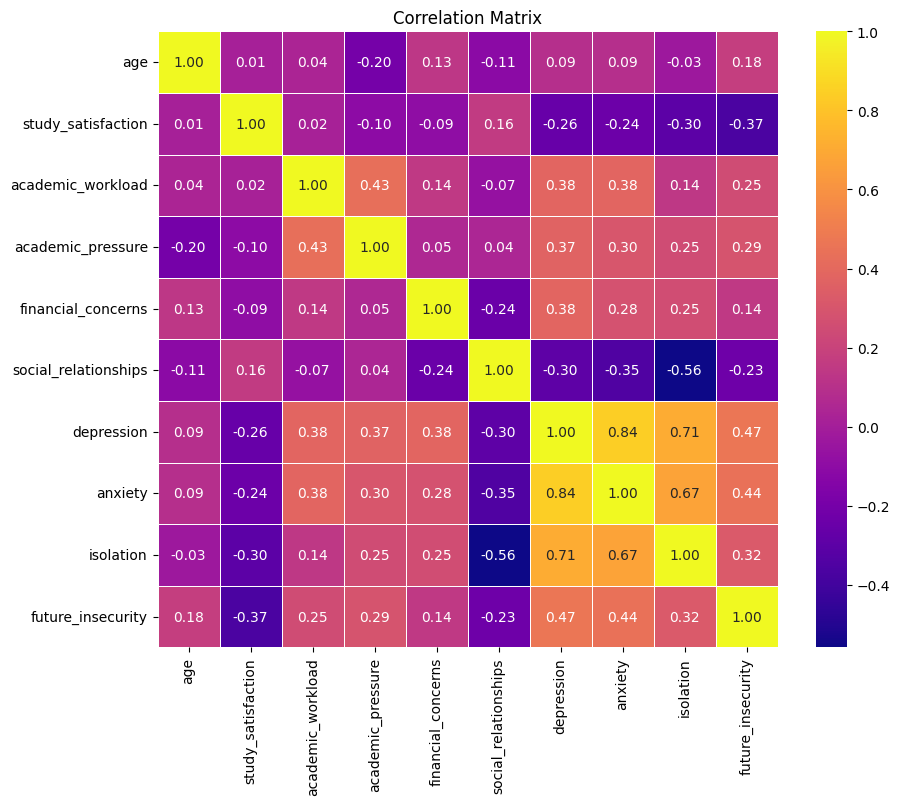

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi
corr_matrix = mental[numeric_columns].corr()  # Matriks korelasi

# Visualisasi heatmap
plt.figure(figsize=(10, 8))  # Ukuran plot
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5)  # Heatmap
plt.title('Correlation Matrix')  # Judul plot
plt.show()  # Tampilkan plot


In [14]:
# Check the column names in the DataFrame to identify if there are extra spaces or issues
print(mental.columns)

# Strip any leading or trailing spaces from column names
mental.columns = mental.columns.str.strip()


Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')


##RADAR CHART

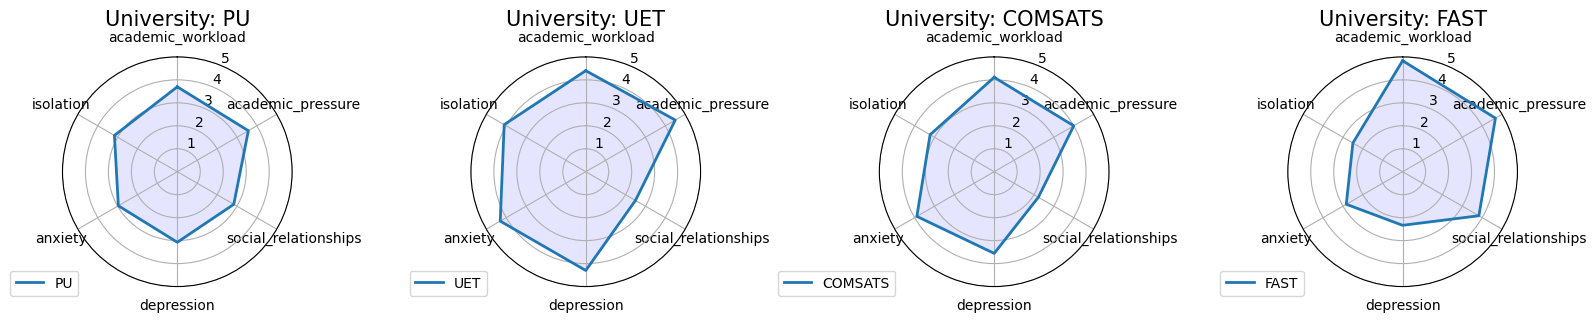

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Kolom untuk median
columns_to_analyze = [
    'academic_workload',
    'academic_pressure',
    'social_relationships',
    'depression',
    'anxiety',
    'isolation'
]

# Hilangkan spasi kolom
mental.columns = mental.columns.str.strip()

# Kelompokkan dan hitung median
grouped = mental.groupby('university')[columns_to_analyze].mean()

# Filter untuk universitas dengan jumlah terbanyak
top_universities = ['PU', 'UET', 'COMSATS', 'FAST']  # Universitas teratas
filtered_grouped = grouped.loc[top_universities]

# Fungsi radar chart
def plot_radar_chart(data, university_name, subplot_index):
    categories = data.index.tolist()  # Kategori
    values = data.values.tolist()     # Nilai

    N = len(categories)  # Jumlah kategori

    angles = [n / float(N) * 2 * pi for n in range(N)]  # Hitung sudut tiap sumbu
    values += values[:1]  # Ulangi nilai pertama
    angles += angles[:1]  # Ulangi sudut pertama

    # Buat plot polar
    ax = plt.subplot(1, 4, subplot_index, projection='polar')
    ax.set_theta_offset(pi / 2)  # Setel offset
    ax.set_theta_direction(-1)  # Balik arah

    ax.set_ylim(0, 5)  # Fixed scale to 5.0

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=university_name)  # Plotkan nilai
    ax.fill(angles, values, 'b', alpha=0.1)  # Isi area plot

    # Shift the title to avoid collision
    ax.set_title(f'University: {university_name}', size=15, y=1.1)  # Title shifted down
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))  # Legenda

plt.figure(figsize=(16, 16))

# Loop universitas dan plot
for i, university in enumerate(filtered_grouped.index):
    plot_radar_chart(filtered_grouped.loc[university], university, i + 1)

plt.tight_layout()  # Layout rapat
plt.show()  # Tampilkan plot


Acedemic and Mental health in different universities
- The following radar graph shows the 5 factors most correlated with depression in students across 4 campuses in Pakistan
- Attribute values are taken from the average of all data across each university
- UET shows High academic load, but limited social relationships, leading to low levels of anxiety and depression
- Lowest levels of depression in FAST. Despite high academic load, however, it is followed by the best social relationships and low isolation

##BOXPLOT

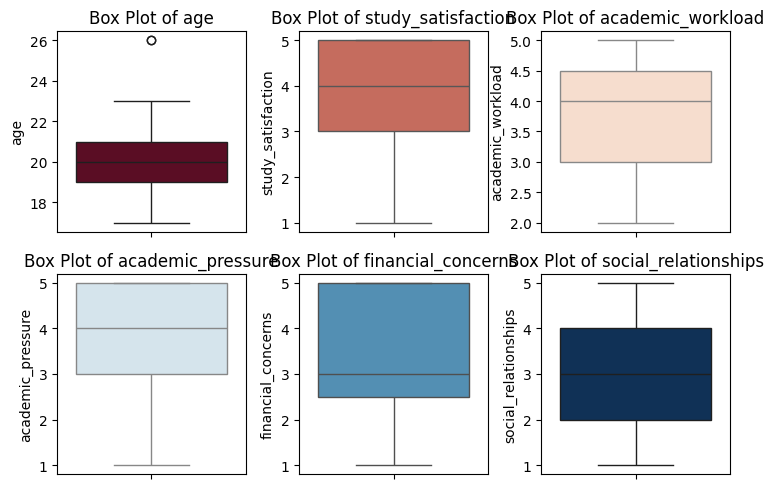

In [16]:


plt.figure(figsize=(7.5, 5))

# Get the RdBu colormap
cmap = plt.colormaps['RdBu']

# Display boxplot
for i, column in enumerate(numeric_columns[:6]):
    plt.subplot(2, 3, i + 1)
    color = cmap(i / 5)  # Normalisasi warna
    sns.boxplot(y=mental[column], color=color)  # Ganti warna
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


###HIGHEST CORRELATION OF ATTRIBUTES

In [17]:
# Hitung matriks korelasi
corr_matrix = mental[numeric_columns].corr()

# nilai absolut korelasi
corr_abs = corr_matrix.abs()
np.fill_diagonal(corr_abs.values, np.nan)

# Rata-rata korelasi
corr_values = corr_matrix.stack()

# Filter out self-correlations and duplicates
filtered_corr = corr_values.loc[corr_values.index.get_level_values(0) < corr_values.index.get_level_values(1)]

# Sort absolute correlation values
highest_corr = filtered_corr.loc[filtered_corr.abs().sort_values(ascending=False).head(7).index]
highest_corr

anxiety            depression              0.844141
depression         isolation               0.710185
anxiety            isolation               0.671894
isolation          social_relationships   -0.558803
depression         future_insecurity       0.465185
anxiety            future_insecurity       0.444924
academic_pressure  academic_workload       0.433020
dtype: float64

Highly Correlated Features
- Anxiety and depression have a high positive correlation in college students
- Isolation also increases the risk of depression and anxiety
- Future insecurity also has a fairly strong correlation with depression and anxiety
- Social relationships have a moderate negative correlation with isolation

###SUMMARY

Depression and anxiety in students are influenced by isolation, future insecurity, and social relationships. FAST has the lowest depression levels due to strong social connections and low isolation, despite a high academic load.